In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Python/practice5005/DBSCAN_Analysis_1.csv')
df.columns

Index(['ID', 'Longitude', 'Latitude', 'Transactio', 'Transact_1', 'Followers',
       'Price_PerS', 'Area', 'BedRoom', 'SittingRoo', 'Kitchen', 'Bathroom',
       'Floor', 'Building_H', 'Building_T', 'Building_Y', 'Renovation',
       'Building_s', 'Elevator_R', 'Elevator', 'Duty_Free', 'Subway_or_',
       'District', 'Average_Pr', 'Total_Pric', 'label', 'label_geo', 'Tourist',
       'Transport', 'Sports', 'Shopping', 'School', 'Rester', 'Hospital',
       'Government', 'Financial', 'Company1', 'Carservice'],
      dtype='object')

In [3]:
df_X = pd.read_csv('C:/Python/practice5005/DBSCAN_Analysis_1.csv',usecols=[ 'Subway_or_','Tourist',
       'Transport', 'Sports', 'Shopping', 'School', 'Rester', 'Hospital',
       'Government', 'Financial', 'Company1', 'Carservice'])
df_X.head(1)

,Subway_or_,Tourist,Transport,Sports,Shopping,School,Rester,Hospital,Government,Financial,Company1,Carservice
0,0,45,66,21,96,66,74,2,276,11,783,193


In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subway_or_  27605 non-null  int64
 1   Tourist     27605 non-null  int64
 2   Transport   27605 non-null  int64
 3   Sports      27605 non-null  int64
 4   Shopping    27605 non-null  int64
 5   School      27605 non-null  int64
 6   Rester      27605 non-null  int64
 7   Hospital    27605 non-null  int64
 8   Government  27605 non-null  int64
 9   Financial   27605 non-null  int64
 10  Company1    27605 non-null  int64
 11  Carservice  27605 non-null  int64
dtypes: int64(12)
memory usage: 2.5 MB


# PCA analysis

In [5]:
df_X.columns

Index(['Subway_or_', 'Tourist', 'Transport', 'Sports', 'Shopping', 'School',
       'Rester', 'Hospital', 'Government', 'Financial', 'Company1',
       'Carservice'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#Standardized data
scaler = StandardScaler()
df_s = scaler.fit_transform(df_X)
df_s

array([[-1.44683924, -0.83173524, -1.78841261, ..., -0.94059084,
        -1.54104267, -1.2205515 ],
       [-1.44683924, -0.74336497, -1.65465947, ..., -0.85016999,
        -1.55000342, -1.56190153],
       [ 0.69116179, -0.69034281, -1.15709778, ..., -0.84012323,
        -0.82034212, -0.92324663],
       ...,
       [ 0.69116179, -0.57840713,  0.43188955, ..., -0.44829955,
        -0.56752088, -0.33964818],
       [ 0.69116179,  0.81195178,  0.76359734, ...,  0.70707798,
        -0.01515447, -0.16346752],
       [-1.44683924, -0.44290605, -0.3278283 , ..., -0.44829955,
        -0.48431389, -0.40021028]])

In [8]:
from sklearn.decomposition import PCA
from sklearn import decomposition
model_pca = PCA(n_components=5)
pca = model_pca.fit_transform(df_s)
pca.shape

(27605, 5)

In [9]:
# how much each column capture(每个新的组成成分能抓住多少信息)
model_pca.explained_variance_ratio_

array([0.46937652, 0.17024795, 0.0884039 , 0.07184254, 0.06532585])

In [10]:
model_pca.n_components_

5

In [11]:
#compute PCA loadings
de_pca = decomposition.PCA(n_components=5)
com_pca = de_pca.fit_transform(df_X)
df_loadings = pd.DataFrame(de_pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5'], index=df_X.columns)

Text(68.09375, 0.5, 'columns')

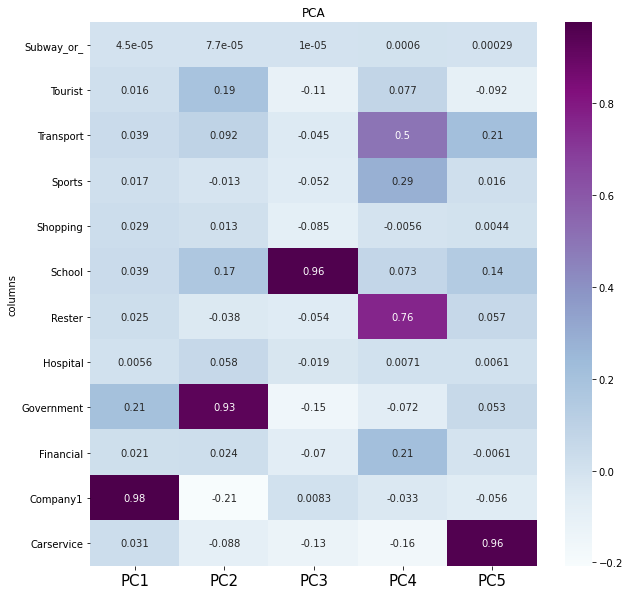

In [12]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_loadings,annot=True,cmap='BuPu',ax=ax)
ax.tick_params(axis='x',labelsize=15)
ax.set_title('PCA',fontsize=12)
ax.set_ylabel('columns')

In [13]:
df_1 = pd.DataFrame(pca,columns=['PC1', 'PC2','PC3','PC4','PC5'])
df_1['Price_PerS'] = df['Price_PerS']

(6.5, -0.5)

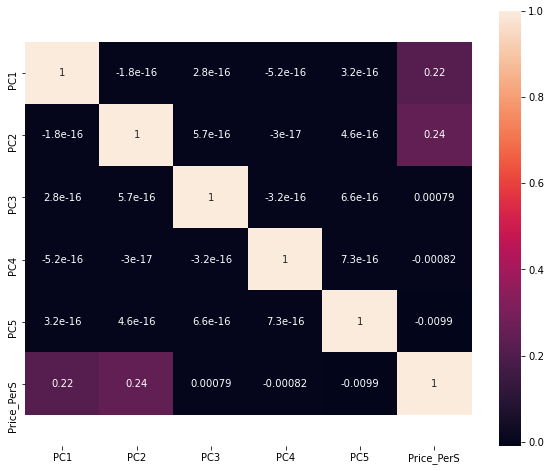

In [14]:
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_1.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# predcit based on feature from PCA

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PC1         27605 non-null  float64
 1   PC2         27605 non-null  float64
 2   PC3         27605 non-null  float64
 3   PC4         27605 non-null  float64
 4   PC5         27605 non-null  float64
 5   Price_PerS  27605 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.3 MB


In [16]:
#Standardized data
ModelScaler = StandardScaler().fit(df_1)
df_scaler = ModelScaler.transform(df_1)
df_s = pd.DataFrame(df_scaler)
df_s.columns = df_1.columns
df_s

,PC1,PC2,PC3,PC4,PC5,Price_PerS
0,-1.810828,0.217006,-0.417740,-0.663988,0.717097,-0.502010
1,-1.689801,0.333573,-0.509454,-0.685176,0.841580,-0.502327
2,-0.995584,-0.058835,-0.472553,0.801649,-0.806264,-1.255112
3,0.528261,1.575272,0.016091,0.084900,-0.649918,0.694928
4,-1.242659,-0.193053,0.391826,-0.766840,0.534069,-1.731254
...,...,...,...,...,...,...
27600,1.204942,0.155642,-0.984355,4.095221,3.086852,-0.960861
27601,0.709942,1.918089,-0.865381,-1.080184,-1.031558,-0.490694
27602,-0.466045,-0.263865,-0.646711,0.427459,-0.916833,-1.130379
27603,0.831946,1.515892,0.168610,-0.552056,-0.950263,-0.645037


# Correlation analysis based on features from PCA

In [17]:
#related analysis by using df_s
df_s.corr()

,PC1,PC2,PC3,PC4,PC5,Price_PerS
PC1,1.000000e+00,4.808285e-17,3.485690e-16,3.351844e-16,4.182370e-16,0.216969
PC2,4.808285e-17,1.000000e+00,7.644874e-16,-3.124551e-17,1.479265e-16,0.242815
PC3,3.485690e-16,7.644874e-16,1.000000e+00,-3.424719e-16,6.981354e-16,0.000786
PC4,3.351844e-16,-3.124551e-17,-3.424719e-16,1.000000e+00,2.742357e-16,-0.000819
PC5,4.182370e-16,1.479265e-16,6.981354e-16,2.742357e-16,1.000000e+00,-0.009850
Price_PerS,2.169689e-01,2.428146e-01,7.857861e-04,-8.190411e-04,-9.850328e-03,1.000000


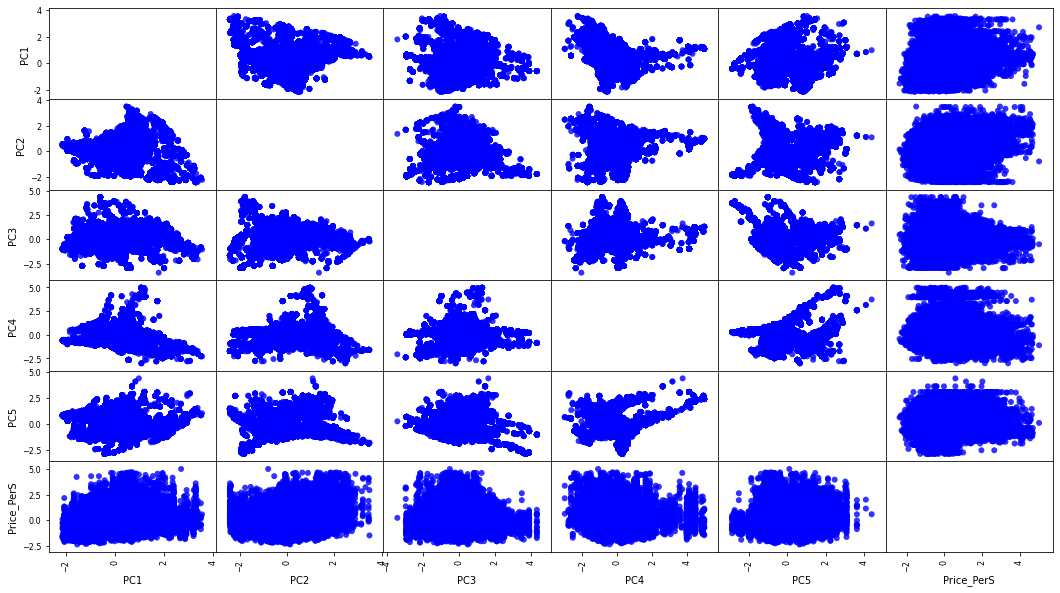

In [18]:
pd.plotting.scatter_matrix(df_s,figsize=(18,10),c='blue',marker='o',diagonal='',alpha=0.8,range_padding=0.2)
plt.show()

(6.5, -0.5)

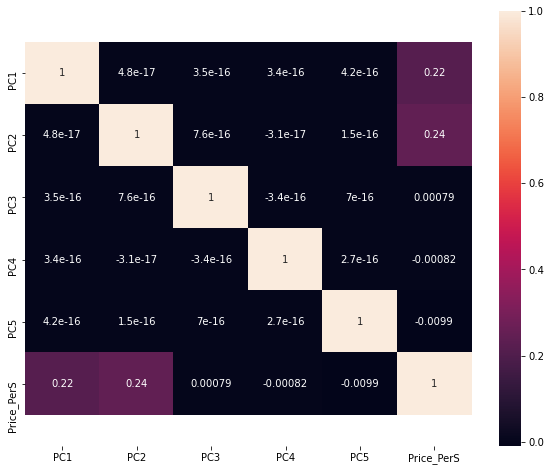

In [19]:
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_s.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Multiple linear regression based on features from PCA

In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [21]:
X = df_s.iloc[:,[0,1,2,3,4]]
Y = df_s.iloc[:,5]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
model_1 = sm.OLS(y_train,X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Price_PerS   R-squared (uncentered):                   0.110
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              478.8
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                        0.00
Time:                        22:17:43   Log-Likelihood:                         -26241.
No. Observations:               19323   AIC:                                  5.249e+04
Df Residuals:                   19318   BIC:                                  5.253e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.2192      0.007     32.358      0.000       0.206       0.232
PC2            0.2468      0.007     36.475      0.000       0.234       0.260
PC3            0.0029      0.007      0.438      0.662      -0.010       0.016
PC4           -0.0058      0.007     -0.849      0.396      -0.019       0.008
PC5           -0.0130      0.007     -1.918      0.055      -0.026       0.000
==============================================================================
Omnibus:                     2145.677   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3352.376
Skew:                           0.808   Prob(JB):                         0.00
Kurtosis:                       4.246   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple linear regression based on the raw data(the data of public facilities)

In [24]:
df_2 = pd.read_csv('C:/Python/practice5005/DBSCAN_Analysis_1.csv',usecols=['Price_PerS', 'Subway_or_','Tourist',
       'Transport', 'Sports', 'Shopping', 'School', 'Rester', 'Hospital',
       'Government', 'Financial', 'Company1', 'Carservice'])
df_2.columns

Index(['Price_PerS', 'Subway_or_', 'Tourist', 'Transport', 'Sports',
       'Shopping', 'School', 'Rester', 'Hospital', 'Government', 'Financial',
       'Company1', 'Carservice'],
      dtype='object')

In [25]:
ModelScaler = StandardScaler().fit(df_2)
df2_scaler = ModelScaler.transform(df_2)
df2_s = pd.DataFrame(df2_scaler)
df2_s.columns = df_2.columns
df2_s

,Price_PerS,Subway_or_,Tourist,Transport,Sports,Shopping,School,Rester,Hospital,Government,Financial,Company1,Carservice
0,-0.502010,-1.446839,-0.831735,-1.788413,-1.304623,-1.772130,-0.944663,-0.685335,-0.944455,-1.408558,-0.940591,-1.541043,-1.220551
1,-0.502327,-1.446839,-0.743365,-1.654659,-1.194702,-1.376622,-0.851097,-0.713843,-0.924460,-1.237136,-0.850170,-1.550003,-1.561902
2,-1.255112,0.691162,-0.690343,-1.157098,-0.381284,-0.567210,-0.318736,-0.850683,-0.984444,-0.947454,-0.840123,-0.820342,-0.923247
3,0.694928,0.691162,0.835517,0.266036,-0.590135,0.030651,0.562078,-0.297623,2.174743,1.085746,0.144459,-0.029236,-0.367176
4,-1.731254,-1.446839,-0.908323,-0.884241,-0.908907,-0.052130,-0.763983,-0.765158,-0.824486,-1.264260,-0.789889,-1.379109,-0.405716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,-0.960861,0.691162,0.299404,0.661945,0.717928,-0.153306,4.872585,2.923809,0.135267,0.494447,0.345395,1.022693,-0.240547
27601,-0.490694,0.691162,2.691293,0.474691,-0.073505,0.104234,-0.125151,-0.046750,1.794840,1.262593,0.345395,-0.590883,-0.703021
27602,-1.130379,0.691162,-0.578407,0.431890,0.234275,-0.512023,-0.499416,-0.799368,-0.464578,-0.939859,-0.448300,-0.567521,-0.339648
27603,-0.645037,0.691162,0.811952,0.763597,-0.645096,0.646908,0.097473,-0.303324,2.454671,1.452460,0.707078,-0.015154,-0.163468


(13.5, -0.5)

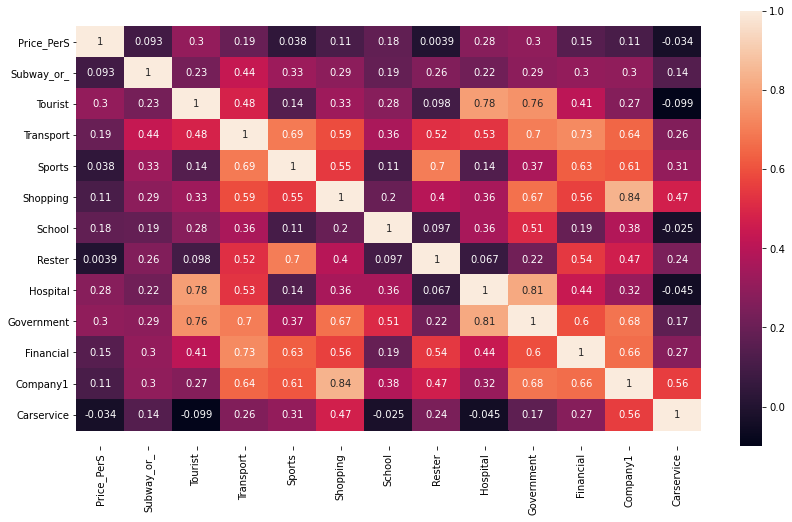

In [29]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(df2_s.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [27]:
X2 = df2_s.iloc[:,1:12]
Y2= df2_s.iloc[:,0]

In [28]:
X2

,Subway_or_,Tourist,Transport,Sports,Shopping,School,Rester,Hospital,Government,Financial,Company1
0,-1.446839,-0.831735,-1.788413,-1.304623,-1.772130,-0.944663,-0.685335,-0.944455,-1.408558,-0.940591,-1.541043
1,-1.446839,-0.743365,-1.654659,-1.194702,-1.376622,-0.851097,-0.713843,-0.924460,-1.237136,-0.850170,-1.550003
2,0.691162,-0.690343,-1.157098,-0.381284,-0.567210,-0.318736,-0.850683,-0.984444,-0.947454,-0.840123,-0.820342
3,0.691162,0.835517,0.266036,-0.590135,0.030651,0.562078,-0.297623,2.174743,1.085746,0.144459,-0.029236
4,-1.446839,-0.908323,-0.884241,-0.908907,-0.052130,-0.763983,-0.765158,-0.824486,-1.264260,-0.789889,-1.379109
...,...,...,...,...,...,...,...,...,...,...,...
27600,0.691162,0.299404,0.661945,0.717928,-0.153306,4.872585,2.923809,0.135267,0.494447,0.345395,1.022693
27601,0.691162,2.691293,0.474691,-0.073505,0.104234,-0.125151,-0.046750,1.794840,1.262593,0.345395,-0.590883
27602,0.691162,-0.578407,0.431890,0.234275,-0.512023,-0.499416,-0.799368,-0.464578,-0.939859,-0.448300,-0.567521
27603,0.691162,0.811952,0.763597,-0.645096,0.646908,0.097473,-0.303324,2.454671,1.452460,0.707078,-0.015154


In [146]:
Y2

0       -0.502010
1       -0.502327
2       -1.255112
3        0.694928
4       -1.731254
           ...   
27600   -0.960861
27601   -0.490694
27602   -1.130379
27603   -0.645037
27604   -0.736882
Name: Price_PerS, Length: 27605, dtype: float64

In [142]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [143]:
model_2 = sm.OLS(y2_train,X2_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Price_PerS   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              235.1
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                        0.00
Time:                        00:32:29   Log-Likelihood:                         -26156.
No. Observations:               19323   AIC:                                  5.233e+04
Df Residuals:                   19312   BIC:                                  5.242e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Subway_or_     0.0131      0.008      1.730      0.084      -0.002       0.028
Tourist        0.1617      0.013     12.749      0.000       0.137       0.187
Transport      0.0507      0.014      3.627      0.000       0.023       0.078
Sports        -0.0317      0.012     -2.565      0.010      -0.056      -0.007
Shopping      -0.0416      0.014     -2.959      0.003      -0.069      -0.014
School         0.0484      0.009      5.356      0.000       0.031       0.066
Rester        -0.0380      0.010     -3.806      0.000      -0.058      -0.018
Hospital      -0.0601      0.015     -4.066      0.000      -0.089      -0.031
Government     0.2510      0.024     10.575      0.000       0.204       0.298
Financial      0.0249      0.012      2.139      0.032       0.002       0.048
Company1      -0.0800      0.017     -4.737      0.000      -0.113      -0.047
==============================================================================
Omnibus:                     2126.312   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3291.807
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       4.220   Cond. No.                         9.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""